# Analisi infetti e deceduti

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from aidam.math_utils import moving_function_rev1
from aidam.aicharts import get_subplot_cells_sequence, confplot_ax
import pickle as pkl
import numpy as np
import pandas as pd

## Lettura dati

In [2]:
data_file='stored_data.pkl'

infile=open(data_file,'rb')
trend=pkl.load(infile)
regioni=pkl.load(infile)
giorni=pkl.load(infile)
giorno_settimana=pkl.load(infile)
infile.close()

day_counter=list(range(len(giorni)))

print('Giorni osservati: %d'%len(giorni))
print('Primo giorno: %s'%giorni[0])
print('Ultimo giorno: %s'%giorni[-1])

Giorni osservati: 79
Primo giorno: 2020-02-24T18:00:00
Ultimo giorno: 2020-05-12T17:00:00


### Inserimento di eventi notevoli riferiti a date

In [3]:
lockdown={'data':'2020-03-10',
          'id_giorno':15,
          'desc':'Lockdown'}

scuole_chiuse={'data':'2020-03-04',
               'id_giorno':9,
               'desc':'Scuole chiuse'}

fase_2={'data':'2020-05-04',
               'id_giorno':71,
               'desc':'Fase2'}


eventi=[scuole_chiuse,lockdown, fase_2]

Calcolo le posizioni nella grid dei subplot dove mettere le figure delle varie regioni e parametri delle figure

In [4]:
# per i subplot determina la griglia
grid_shape=(7,3)
grid_seq=get_subplot_cells_sequence(grid_shape)

# dimensioni figure (figsize) per figure singole e figure composte (subplot)
figsize_single=(9,6)
figsize_multi=(16,16)


## Grafici Nazionali

In [5]:
indicatori_selected=['nuovi_positivi',
                     'guariti_giornalieri',
                    'variazione_totale_positivi',
                    'totale_positivi']

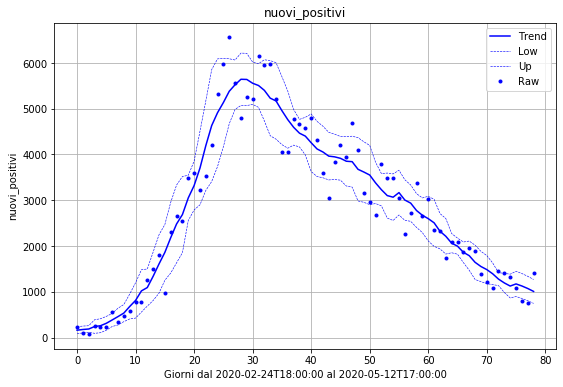

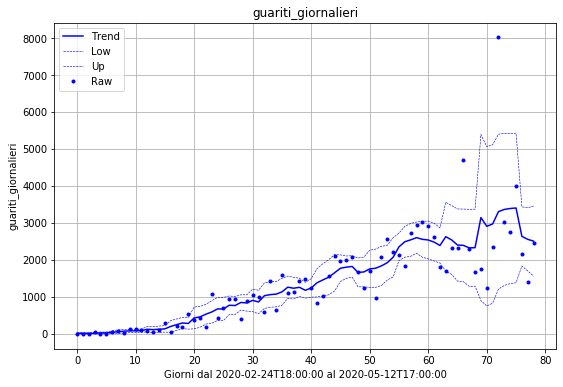

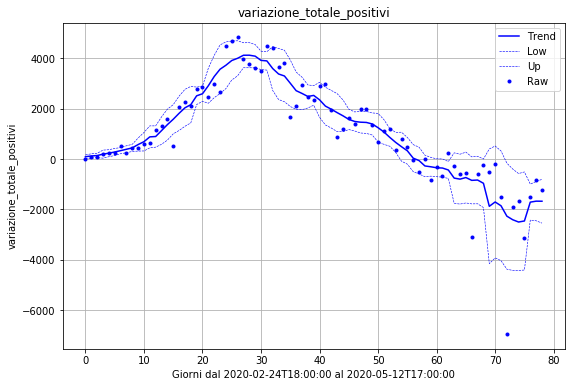

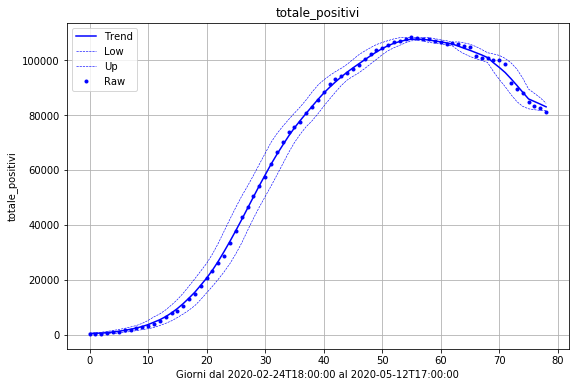

In [6]:
for indicatore in indicatori_selected:
    fig,ax=plt.subplots(1,figsize=figsize_single)
    # stampo il plot smooth con intervallo di confidenza
    confplot_ax(day_counter,
                   trend[indicatore]['Italia'],
                   window=(3,3),ax=ax,conf_fun='deviation', )
    ax.set_title(indicatore)
    ax.set_xlabel('Giorni dal %s al %s'%(giorni[0],giorni[-1]))
    ax.set_ylabel(indicatore)
    # stampo anche a punti il dato raw
    ax.plot(day_counter,trend[indicatore]['Italia'],'b.')
    ax.legend(['Trend','Low','Up','Raw'])
    ax.grid()



In [7]:
indicatori_selected=['totale_positivi',
                     'deceduti_giornalieri',
                     'terapia_intensiva']

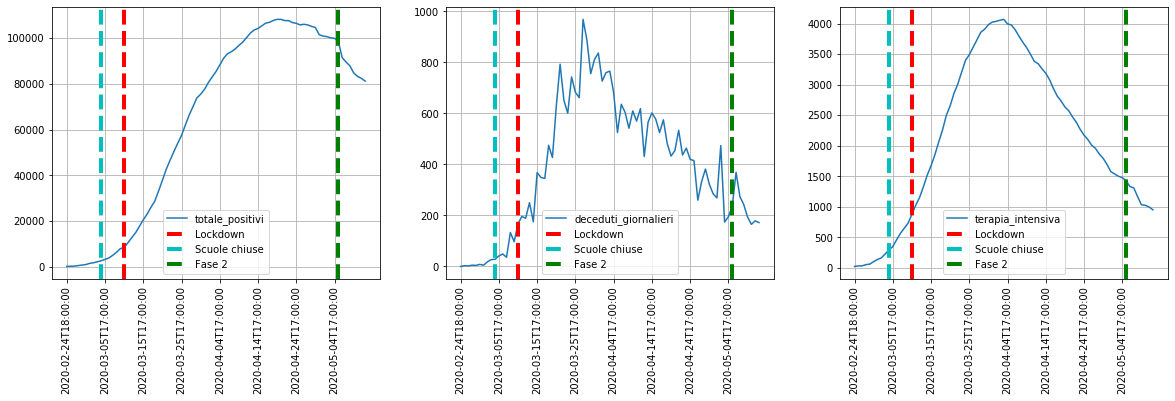

In [8]:
fig,ax=plt.subplots(1,3,figsize=(20,5))
for i,indicatore in enumerate(indicatori_selected):  
    ax[i].plot(day_counter,
             trend[indicatore]['Italia'],label=indicatore)
    ax[i].set_xticks(list(range(0,len(giorni),10)))
    ax[i].set_xticklabels(giorni[list(range(0,len(giorni),10))],rotation=90)
    ax[i].axvline(x=lockdown['id_giorno'],c='r', label='Lockdown',linewidth=4,ls='--')
    ax[i].axvline(x=scuole_chiuse['id_giorno'],c='c', label='Scuole chiuse',linewidth=4,ls='--')
    ax[i].axvline(x=fase_2['id_giorno'],c='g', label='Fase 2',linewidth=4,ls='--')
    ax[i].grid()
    ax[i].legend()

### Grafici per regione

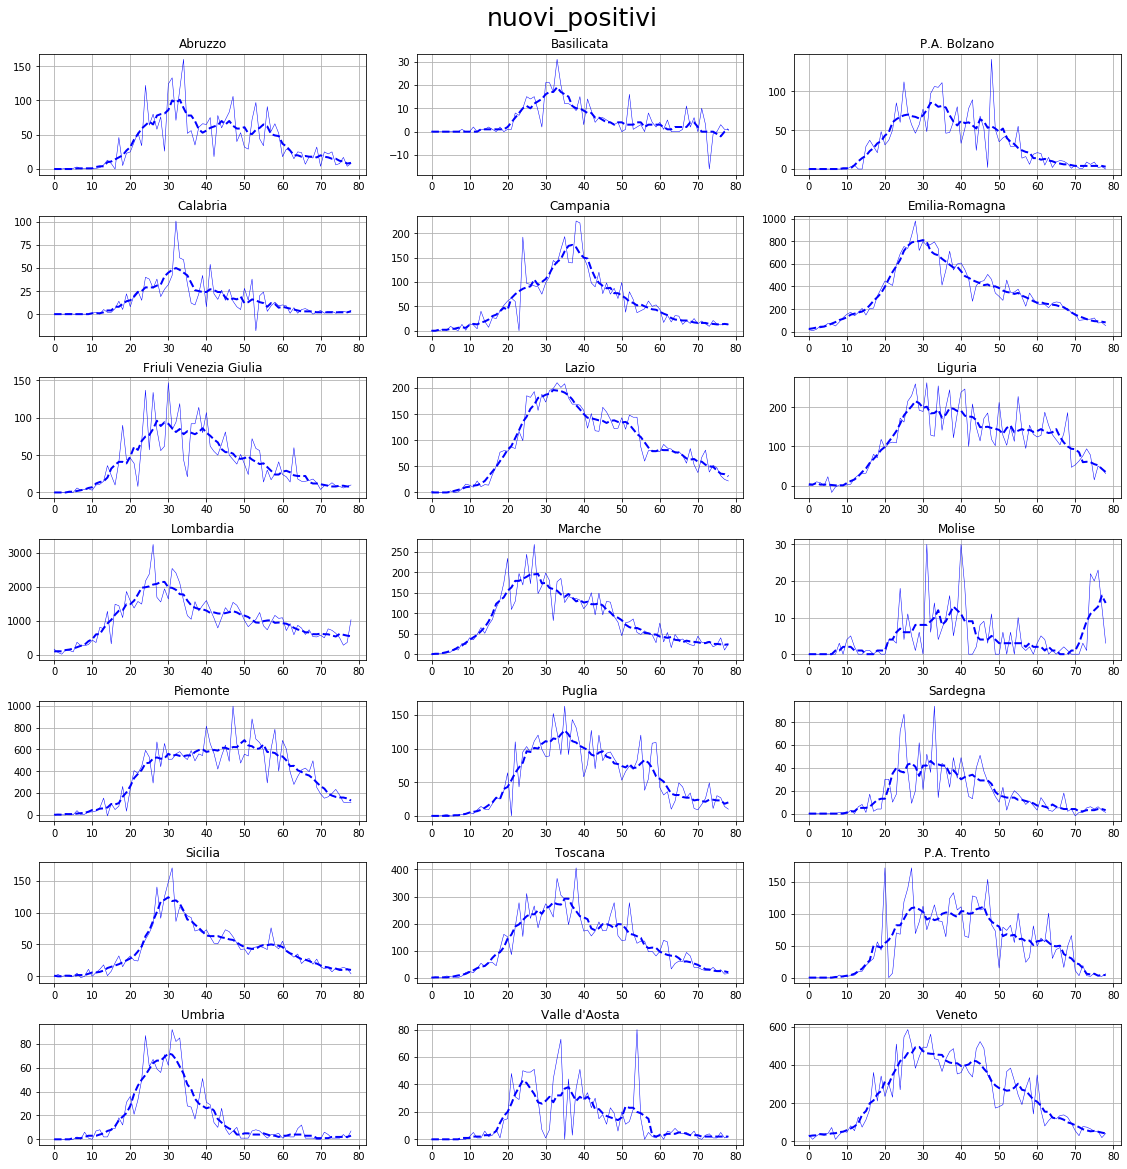

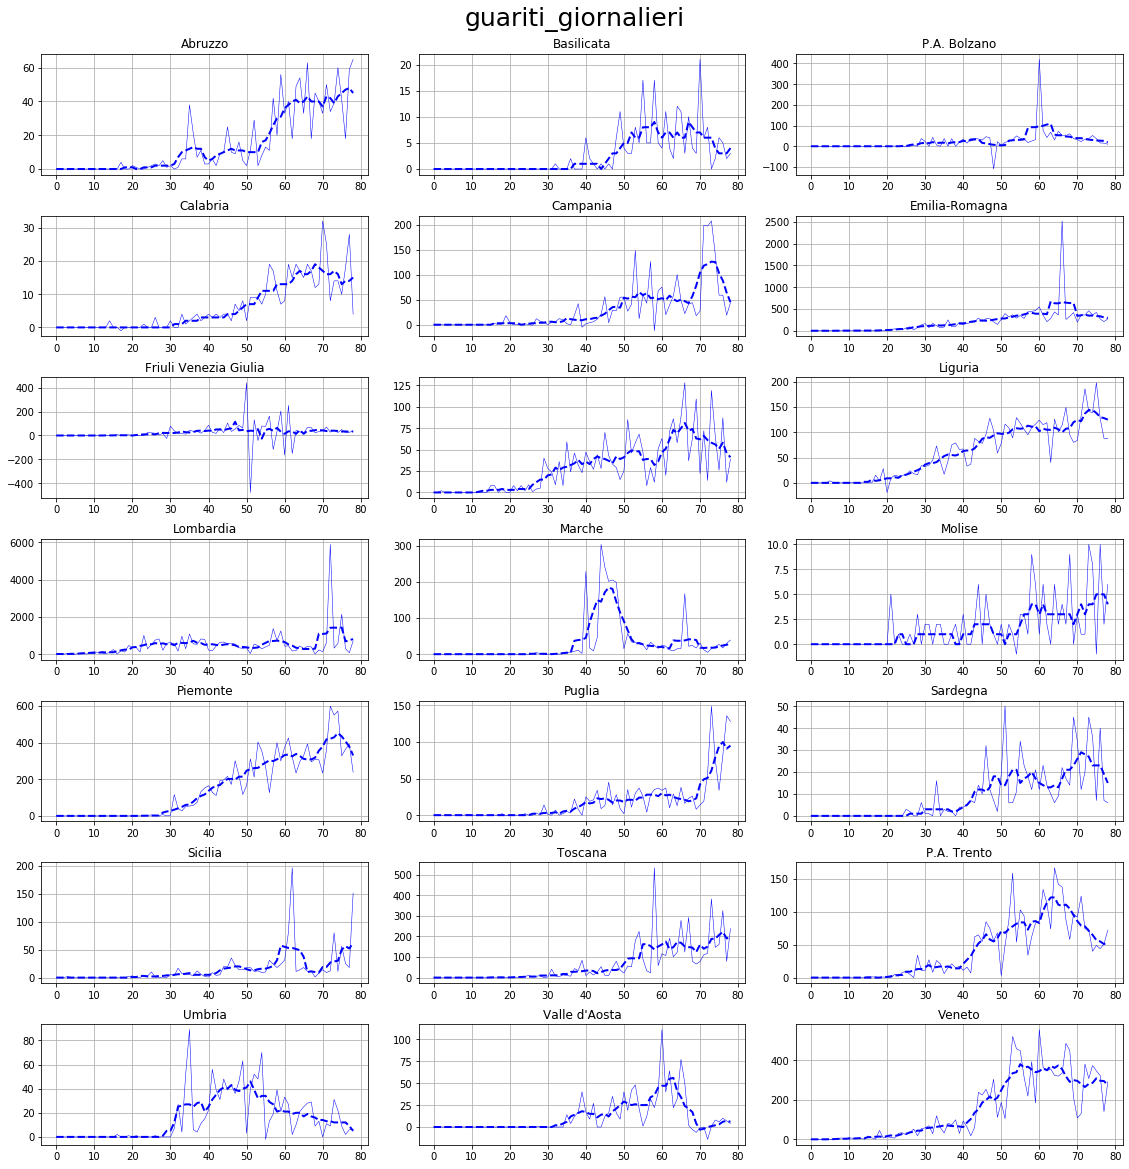

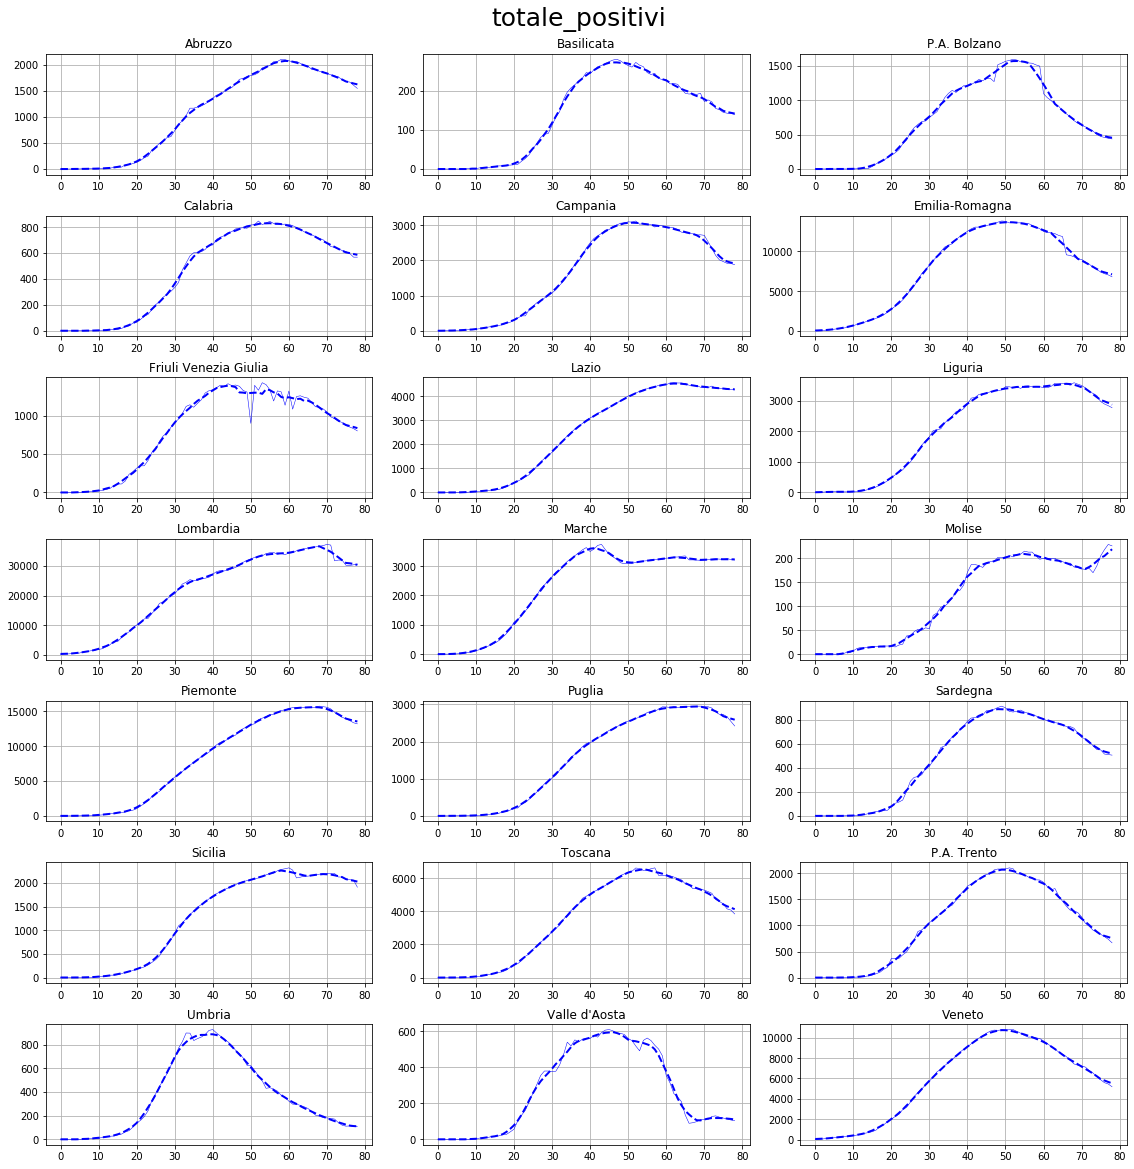

In [9]:
indicatori_selected=['nuovi_positivi',
                    'guariti_giornalieri',
                    'totale_positivi']

for indicatore in indicatori_selected:

    fig,ax=plt.subplots(grid_shape[0],grid_shape[1],sharey=False,figsize=figsize_multi)
    fig.suptitle(indicatore, y=1.02,fontsize=25)
    fig.tight_layout(pad=2.0)

    for i,regione in enumerate(regioni):
        ax[grid_seq[i]].plot(day_counter,trend[indicatore][regione],
                             'b-',linewidth=0.5,label='Reg')
        ax[grid_seq[i]].plot(day_counter,moving_function_rev1(trend[indicatore][regione],np.mean,3,3),
                             'b--',linewidth=2,label='Trend')
        ax[grid_seq[i]].set_title(regione)
        #ax[grid_seq[i]].legend()
        ax[grid_seq[i]].grid()
    fig.savefig('PIC_%s.JPG'%indicatore)

## Deceduti nel tempo
**Italia Giornalieri**

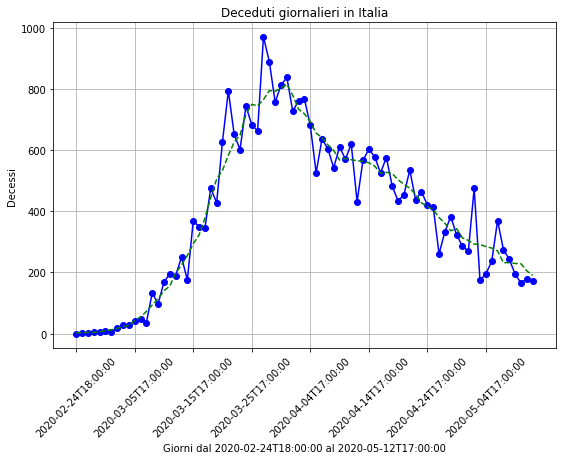

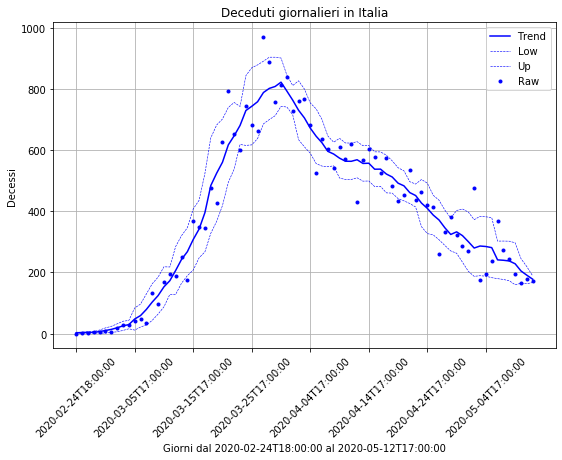

In [10]:
plt.figure(figsize=figsize_single)
plt.plot(day_counter,
         trend['deceduti_giornalieri']['Italia'],
        'bo-')
plt.plot(day_counter,
         moving_function_rev1(trend['deceduti_giornalieri']['Italia'],np.mean,4,3),
        'g--')
plt.title('Deceduti giornalieri in Italia')
plt.xlabel('Giorni dal %s al %s'%(giorni[0],giorni[-1]))
plt.xticks(list(range(0,len(giorni),10)),giorni[list(range(0,len(giorni),10))],rotation=45)
plt.ylabel('Decessi')
plt.grid()



fig,ax=plt.subplots(1,figsize=figsize_single)
# stampo il plot smooth con intervallo di confidenza
confplot_ax(day_counter,
            trend['deceduti_giornalieri']['Italia'],
            window=(3,3),
            ax=ax,conf_fun='deviation', )
ax.set_title('Deceduti giornalieri in Italia')
ax.set_xlabel('Giorni dal %s al %s'%(giorni[0],giorni[-1]))
ax.set_ylabel('Decessi')
# stampo anche a punti il dato raw
ax.plot(trend['deceduti_giornalieri']['Italia'],'b.')
ax.legend(['Trend','Low','Up','Raw'])
ax.set_xticks(list(range(0,len(giorni),10)))
ax.set_xticklabels(giorni[list(range(0,len(giorni),10))],rotation=45)
ax.grid()

**Per regione giornalieri**

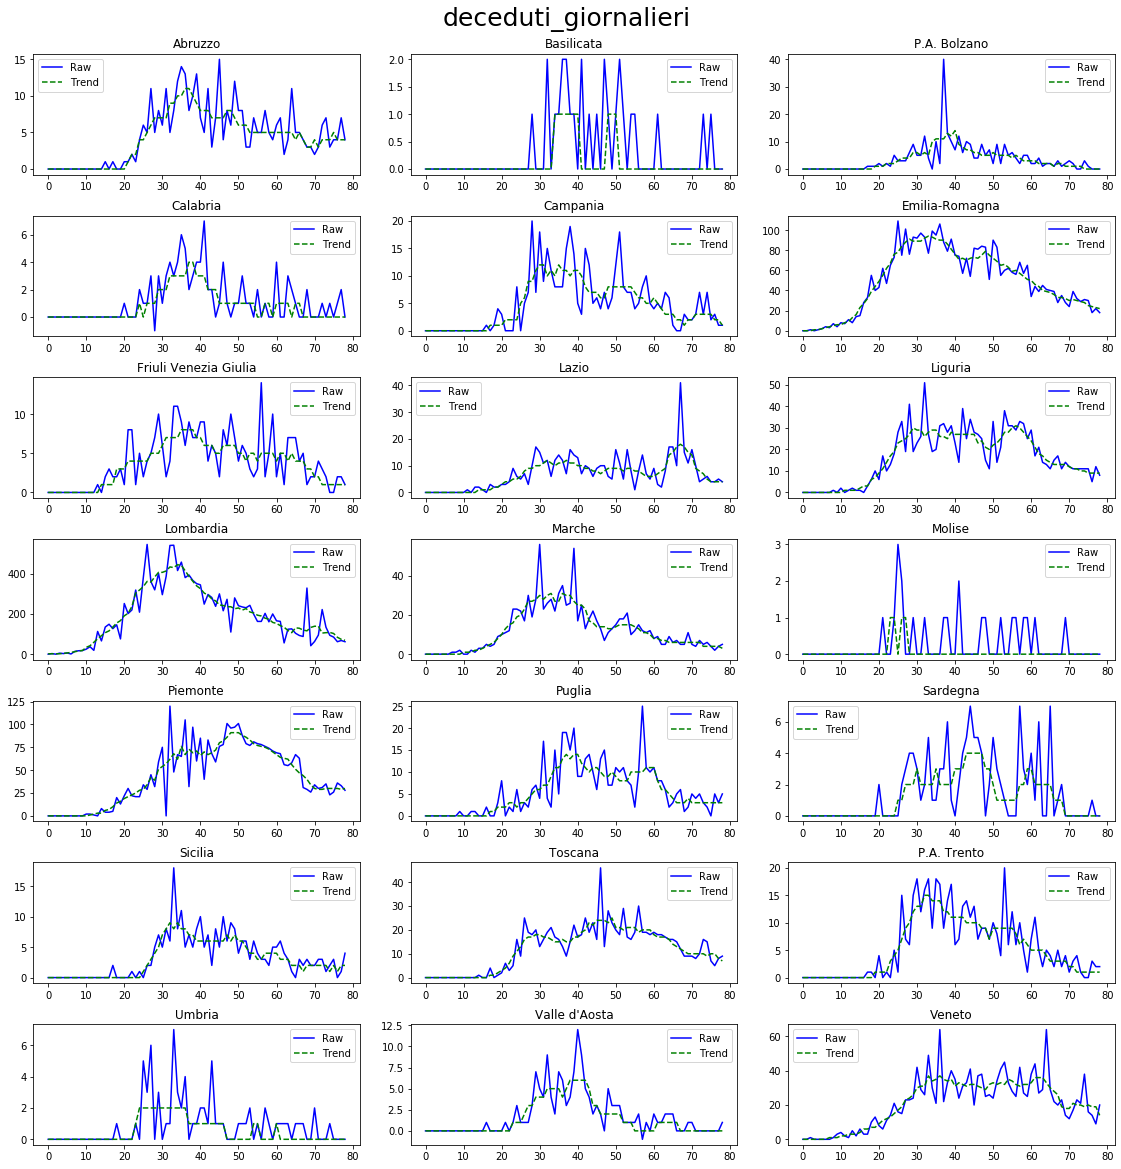

In [11]:
fig,ax=plt.subplots(grid_shape[0],grid_shape[1],sharey=False,figsize=figsize_multi)
fig.suptitle('deceduti_giornalieri', y=1.02,fontsize=25)
fig.tight_layout(pad=2.0)

for i,regione in enumerate(regioni):
    ax[grid_seq[i]].plot(day_counter,trend['deceduti_giornalieri'][regione],'b-',label='Raw')
    ax[grid_seq[i]].set_title(regione)
    # plotto anche media
    ax[grid_seq[i]].plot(day_counter,
                         moving_function_rev1(trend['deceduti_giornalieri'][regione],np.mean,3,3),
                         'g--',
                         label='Trend')
    ax[grid_seq[i]].legend()

### Relazione fra deceduti e terapia intensiva

In [12]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(trend['terapia_intensiva']['Italia'].reshape(-1, 1),
         trend['deceduti_giornalieri']['Italia'])

newx=np.linspace(0,max(trend['terapia_intensiva']['Italia'])).reshape(-1,1)

lry=lr.predict(newx)

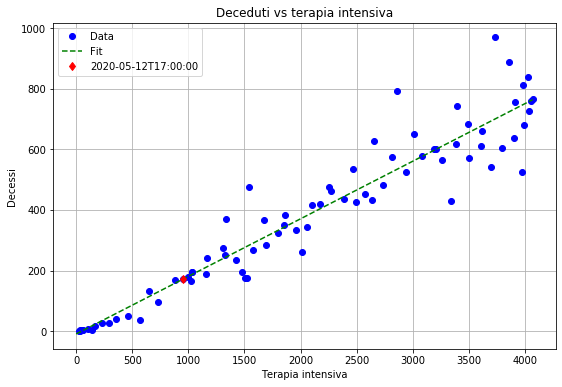

In [13]:
plt.figure(figsize=figsize_single)
plt.plot(trend['terapia_intensiva']['Italia'],
         trend['deceduti_giornalieri']['Italia'],
        'bo',label='Data',)

plt.plot(newx,
         lry,
        'g--',label='Fit',)

plt.plot(trend['terapia_intensiva']['Italia'][-1],
         trend['deceduti_giornalieri']['Italia'][-1],
        'rd',label=giorni[-1],)


plt.title('Deceduti vs terapia intensiva')
plt.xlabel('Terapia intensiva')
plt.ylabel('Decessi')
plt.legend()
plt.grid()

## Deceduti vs Guariti

Trend della percentuale giornaliera di **deceduti** e **guariti** rispetto al numero di *attualmente* infetti (al giorno precedente)

In [14]:
pd.DataFrame(np.array([trend['perc_guariti_su_positivi']['Italia'],trend['perc_deceduti_su_positivi']['Italia']]).T,
            index=giorni,columns=['% Guariti su pos','% Deceduti su pos'])

,% Guariti su pos,% Deceduti su pos
2020-02-24T18:00:00,0.000000,0.000000
2020-02-25T18:00:00,0.000000,1.357466
2020-02-26T18:00:00,0.643087,0.643087
2020-02-27T18:00:00,10.909091,1.298701
2020-02-28T18:00:00,0.170068,0.680272
2020-02-29T17:00:00,0.487211,0.974421
2020-03-01T17:00:00,3.145853,0.476644
2020-03-02T18:00:00,4.185162,1.141408
2020-03-03T18:00:00,0.599455,1.471390
2020-03-04T17:00:00,5.125939,1.237296


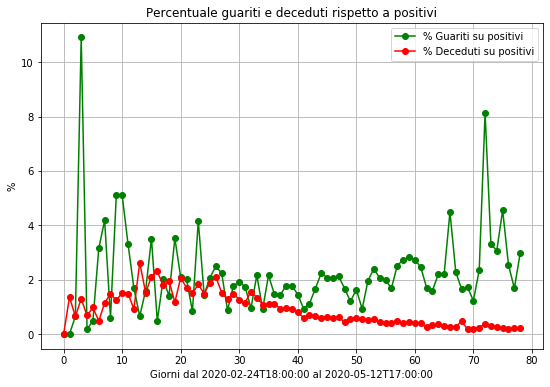

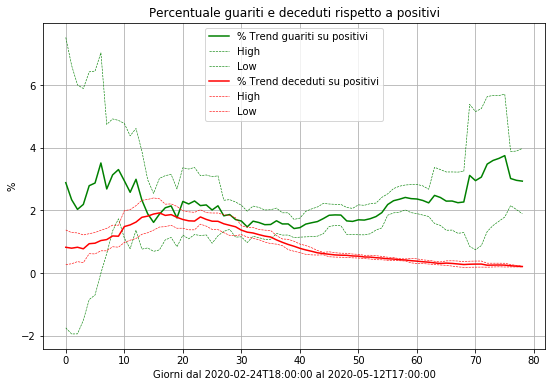

In [15]:
plt.figure(figsize=figsize_single)
plt.plot(day_counter,
         trend['perc_guariti_su_positivi']['Italia'],
         'go-',
         label='% Guariti su positivi')

plt.plot(day_counter,
         trend['perc_deceduti_su_positivi']['Italia'],
        'ro-',
        label='% Deceduti su positivi')

plt.title('Percentuale guariti e deceduti rispetto a positivi')
plt.xlabel('Giorni dal %s al %s'%(giorni[0],giorni[-1]))
plt.ylabel('%')
plt.legend()
plt.grid()



fig,ax=plt.subplots(1,figsize=figsize_single)
# stampo il plot smooth con intervallo di confidenza
confplot_ax(day_counter,
            trend['perc_guariti_su_positivi']['Italia'],
            window=(3,3),
            ax=ax,conf_fun='deviation',color='g')
confplot_ax(day_counter,
            trend['perc_deceduti_su_positivi']['Italia'],
            window=(3,3),
            ax=ax,conf_fun='deviation',color='r')

ax.set_title('Percentuale guariti e deceduti rispetto a positivi')
ax.set_xlabel('Giorni dal %s al %s'%(giorni[0],giorni[-1]))
ax.set_ylabel('%')
# stampo anche a punti il dato raw
#ax.plot(trend['perc_guariti_su_positivi']['Italia'],'g.')
#ax.plot(trend['perc_deceduti_su_positivi']['Italia'],'r.')
ax.legend(['% Trend guariti su positivi','High','Low',
           '% Trend deceduti su positivi','High','Low',
           '% Raw guariti su positivi',
           '% Raw deceduti su positivi'])
ax.grid()

C:\Users\klaat\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\klaat\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
C:\Users\klaat\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


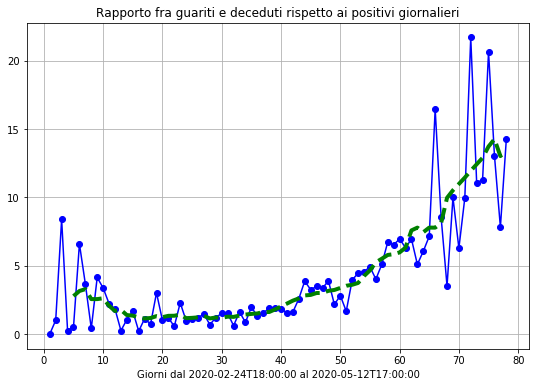

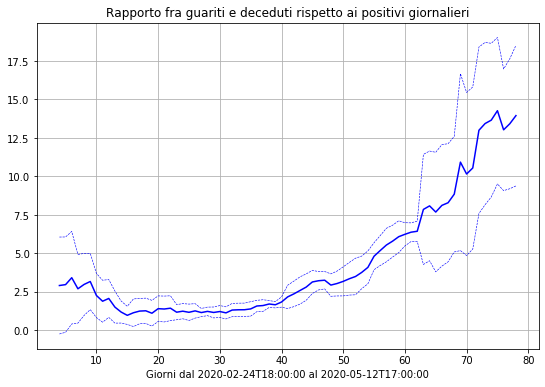

In [16]:
plt.figure(figsize=figsize_single)
plt.plot(day_counter,
         trend['perc_guariti_su_positivi']['Italia']/trend['perc_deceduti_su_positivi']['Italia'],
        'bo-')

plt.plot(day_counter,
         moving_function_rev1(trend['perc_guariti_su_positivi']['Italia']/trend['perc_deceduti_su_positivi']['Italia'],
                              np.mean,4,4),
        'g--',
        linewidth=4)

plt.title('Rapporto fra guariti e deceduti rispetto ai positivi giornalieri')
plt.xlabel('Giorni dal %s al %s'%(giorni[0],giorni[-1]))
plt.grid()



fig,ax=plt.subplots(1,figsize=figsize_single)
# stampo il plot smooth con intervallo di confidenza
confplot_ax(day_counter,
            trend['perc_guariti_su_positivi']['Italia']/trend['perc_deceduti_su_positivi']['Italia'],
            window=(3,3),
            ax=ax,conf_fun='deviation')
ax.set_title('Rapporto fra guariti e deceduti rispetto ai positivi giornalieri')
ax.set_xlabel('Giorni dal %s al %s'%(giorni[0],giorni[-1]))
# stampo anche a punti il dato raw
#ax.plot(trend['perc_guariti_su_positivi']['Italia']/trend['perc_deceduti_su_positivi']['Italia'],'bx')
#ax.legend(['Trend','Low','Up','Raw'])
ax.grid()
